<a href="https://colab.research.google.com/github/kerenslendyrc/Estadistica/blob/main/icfes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from scipy.stats import spearmanr, kendalltau

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving SB11_20231.TXT to SB11_20231.TXT


In [ ]:
import pandas as pd
import io
datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']),
delimiter='¬')

<ipython-input-4-c1ae09edc2a1>:3: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']),


In [ ]:
icfes_sin_nan = datos_icfes[
    (~datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
    (~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
    (~datos_icfes['PUNT_MATEMATICAS'].isna()) &
    (~datos_icfes['PUNT_C_NATURALES'].isna()) &
    (~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
    (~datos_icfes['PUNT_INGLES'].isna())
]


In [ ]:
icfes_sin_nan = icfes_sin_nan.dropna()


In [ ]:
print(icfes_sin_nan.isna().sum())


ESTU_TIPODOCUMENTO           0
ESTU_NACIONALIDAD            0
ESTU_GENERO                  0
ESTU_FECHANACIMIENTO         0
PERIODO                      0
                            ..
ESTU_INSE_INDIVIDUAL         0
ESTU_NSE_INDIVIDUAL          0
ESTU_NSE_ESTABLECIMIENTO     0
PERCENTIL_ESPECIAL_GLOBAL    0
ESTU_ESTADOINVESTIGACION     0
Length: 83, dtype: int64


In [ ]:
# Filtrar solo las columnas deseadas
variables_interes = [
    'ESTU_INSE_INDIVIDUAL',
    'PUNT_LECTURA_CRITICA',
    'PUNT_MATEMATICAS',
    'PUNT_C_NATURALES',
    'PUNT_SOCIALES_CIUDADANAS',
    'PUNT_INGLES'
]

# Contar datos originales y NaN
total_datos = datos_icfes[variables_interes].count()
total_na = datos_icfes[variables_interes].isna().sum()

# Crear un DataFrame para almacenar los resultados
resultados = pd.DataFrame({
    'Total': total_datos,
    'NaN': total_na,
})

# Filtrar datos para eliminar NaN
icfes_sin_nan = datos_icfes.dropna(subset=variables_interes)

# Contar datos restantes
datos_quedaron = icfes_sin_nan[variables_interes].count()

# Agregar los datos restantes al DataFrame
resultados['Quedaron'] = datos_quedaron

# Mostrar resultados
print(resultados)


                          Total  NaN  Quedaron
ESTU_INSE_INDIVIDUAL      11855  849     11853
PUNT_LECTURA_CRITICA      12704    0     11853
PUNT_MATEMATICAS          12704    0     11853
PUNT_C_NATURALES          12704    0     11853
PUNT_SOCIALES_CIUDADANAS  12704    0     11853
PUNT_INGLES               12702    2     11853


In [ ]:
tabla_regresion = icfes_sin_nan[["ESTU_INSE_INDIVIDUAL", 'PUNT_LECTURA_CRITICA',
    'PUNT_MATEMATICAS',
    'PUNT_C_NATURALES',
    'PUNT_SOCIALES_CIUDADANAS',
    'PUNT_INGLES']]
tabla_regresion.head(3)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,67.532814,100,83,77,77,87.0
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0


In [ ]:
# Filtrar tabla_regresion
tabla_regresion1 = tabla_regresion[
    (tabla_regresion["PUNT_LECTURA_CRITICA"] >= 0) &
    (tabla_regresion["PUNT_LECTURA_CRITICA"] <= 80) &
    (tabla_regresion["PUNT_MATEMATICAS"] >= 0) &
    (tabla_regresion["PUNT_MATEMATICAS"] <= 80) &
    (tabla_regresion["PUNT_C_NATURALES"] >= 0) &
    (tabla_regresion["PUNT_C_NATURALES"] <= 80) &
    (tabla_regresion["PUNT_SOCIALES_CIUDADANAS"] >= 0) &
    (tabla_regresion["PUNT_SOCIALES_CIUDADANAS"] <= 80) &
    (tabla_regresion["PUNT_INGLES"] >= 0) &
    (tabla_regresion["PUNT_INGLES"] <= 80)
]

# Mostrar las primeras 5 filas del resultado
tabla_regresion1.head(5)


,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0
5,57.690401,63,38,60,59,45.0
6,39.984838,69,60,59,51,50.0
7,50.613232,57,68,74,61,52.0


In [ ]:
# Lista de las variables a analizar
variables = [
    'PUNT_LECTURA_CRITICA',
    'PUNT_MATEMATICAS',
    'PUNT_C_NATURALES',
    'PUNT_SOCIALES_CIUDADANAS',
    'PUNT_INGLES',
    'ESTU_INSE_INDIVIDUAL'
]

# Calcular mínimo y máximo de cada variable
for var in variables:
    min_value = datos_icfes[var].min()
    max_value = datos_icfes[var].max()
    print(f'{var}: Mínimo = {min_value}, Máximo = {max_value}')


PUNT_LECTURA_CRITICA: Mínimo = 25, Máximo = 100
PUNT_MATEMATICAS: Mínimo = 16, Máximo = 100
PUNT_C_NATURALES: Mínimo = 27, Máximo = 100
PUNT_SOCIALES_CIUDADANAS: Mínimo = 24, Máximo = 100
PUNT_INGLES: Mínimo = 26.0, Máximo = 100.0
ESTU_INSE_INDIVIDUAL: Mínimo = 23.4169272033298, Máximo = 83.0073214808417


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

tabla_regresion1 = tabla_regresion1.dropna(subset=['PUNT_LECTURA_CRITICA', 'ESTU_INSE_INDIVIDUAL'])

modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(np.array(tabla_regresion1['PUNT_LECTURA_CRITICA']).reshape(-1, 1), np.array(tabla_regresion1['ESTU_INSE_INDIVIDUAL']).reshape(-1, 1))
pred_lineal = regresion.predict(np.array(tabla_regresion1['PUNT_LECTURA_CRITICA']).reshape(-1, 1))
pred_lineal


array([[57.50524395],
       [59.08360712],
       [61.05656108],
       ...,
       [62.24033346],
       [61.25385648],
       [62.24033346]])

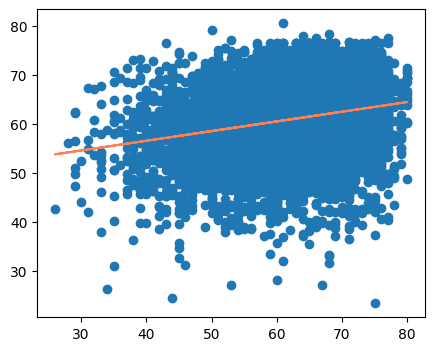

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_LECTURA_CRITICA'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
plt.plot(tabla_regresion1['PUNT_LECTURA_CRITICA'], pred_lineal, linestyle='-', color = "coral")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

tabla_regresion1 = tabla_regresion1.dropna(subset=['PUNT_MATEMATICAS', 'ESTU_INSE_INDIVIDUAL'])

modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(np.array(tabla_regresion1['PUNT_MATEMATICAS']).reshape(-1, 1), np.array(tabla_regresion1['ESTU_INSE_INDIVIDUAL']).reshape(-1, 1))
pred_lineal = regresion.predict(np.array(tabla_regresion1['PUNT_MATEMATICAS']).reshape(-1, 1))
pred_lineal

array([[57.17735946],
       [59.80903819],
       [56.6134283 ],
       ...,
       [60.37296934],
       [61.68880871],
       [62.06476281]])

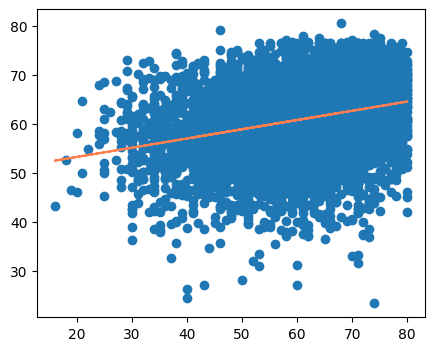

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_MATEMATICAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
plt.plot(tabla_regresion1['PUNT_MATEMATICAS'], pred_lineal, linestyle='-', color = "coral")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

tabla_regresion1 = tabla_regresion1.dropna(subset=['PUNT_C_NATURALES', 'ESTU_INSE_INDIVIDUAL'])

modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(np.array(tabla_regresion1['PUNT_C_NATURALES']).reshape(-1, 1), np.array(tabla_regresion1['ESTU_INSE_INDIVIDUAL']).reshape(-1, 1))
pred_lineal = regresion.predict(np.array(tabla_regresion1['PUNT_C_NATURALES']).reshape(-1, 1))
pred_lineal

array([[57.57124781],
       [57.57124781],
       [61.17790906],
       ...,
       [60.98808478],
       [62.506679  ],
       [63.64562465]])

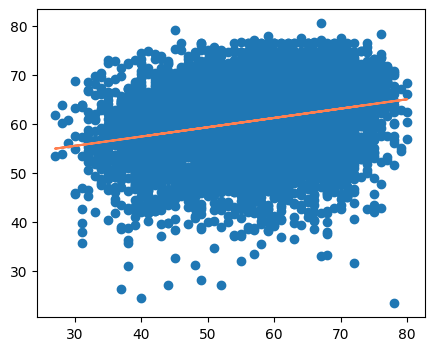

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_C_NATURALES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
plt.plot(tabla_regresion1['PUNT_C_NATURALES'], pred_lineal, linestyle='-', color = "coral")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

tabla_regresion1 = tabla_regresion1.dropna(subset=['PUNT_SOCIALES_CIUDADANAS', 'ESTU_INSE_INDIVIDUAL'])

modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(np.array(tabla_regresion1['PUNT_SOCIALES_CIUDADANAS']).reshape(-1, 1), np.array(tabla_regresion1['ESTU_INSE_INDIVIDUAL']).reshape(-1, 1))
pred_lineal = regresion.predict(np.array(tabla_regresion1['PUNT_SOCIALES_CIUDADANAS']).reshape(-1, 1))
pred_lineal

array([[55.67200185],
       [60.52489231],
       [61.02691546],
       ...,
       [61.02691546],
       [62.03096176],
       [60.02286916]])

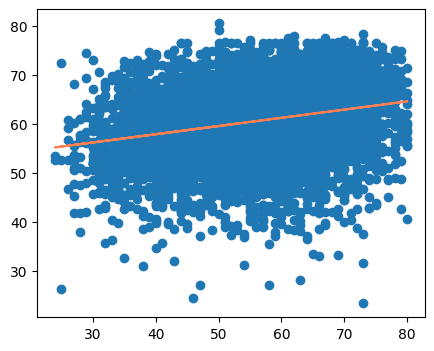

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_SOCIALES_CIUDADANAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
plt.plot(tabla_regresion1['PUNT_SOCIALES_CIUDADANAS'], pred_lineal, linestyle='-', color = "coral")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

tabla_regresion1 = tabla_regresion1.dropna(subset=['PUNT_INGLES', 'ESTU_INSE_INDIVIDUAL'])

modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(np.array(tabla_regresion1['PUNT_INGLES']).reshape(-1, 1), np.array(tabla_regresion1['ESTU_INSE_INDIVIDUAL']).reshape(-1, 1))
pred_lineal = regresion.predict(np.array(tabla_regresion1['PUNT_INGLES']).reshape(-1, 1))
pred_lineal

array([[58.30319532],
       [61.63304699],
       [54.36791607],
       ...,
       [58.00048153],
       [64.0547573 ],
       [61.93576078]])

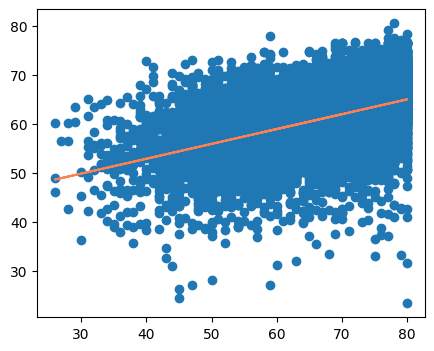

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_INGLES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
plt.plot(tabla_regresion1['PUNT_INGLES'], pred_lineal, linestyle='-', color = "coral")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

variables_puntajes = [
    'PUNT_LECTURA_CRITICA',
    'PUNT_MATEMATICAS',
    'PUNT_C_NATURALES',
    'PUNT_SOCIALES_CIUDADANAS',
    'PUNT_INGLES'
]

for var in variables_puntajes:

    X = np.array(tabla_regresion1[var]).reshape(-1, 1)
    y = np.array(tabla_regresion1['ESTU_INSE_INDIVIDUAL']).reshape(-1, 1)

    modelo_lineal = LinearRegression()
    modelo_lineal.fit(X, y)

    pred_lineal = modelo_lineal.predict(X)

    print(f'\nVariable explicativa: {var}')
    print(f'Coeficiente de la regresión: {modelo_lineal.coef_[0][0]:.4f}')
    print(f'Intercepto de la regresión: {modelo_lineal.intercept_[0]:.4f}')



Variable explicativa: PUNT_LECTURA_CRITICA
Coeficiente de la regresión: 0.1973
Intercepto de la regresión: 48.6270

Variable explicativa: PUNT_MATEMATICAS
Coeficiente de la regresión: 0.1880
Intercepto de la regresión: 49.4703

Variable explicativa: PUNT_C_NATURALES
Coeficiente de la regresión: 0.1898
Intercepto de la regresión: 49.7885

Variable explicativa: PUNT_SOCIALES_CIUDADANAS
Coeficiente de la regresión: 0.1673
Intercepto de la regresión: 51.1538

Variable explicativa: PUNT_INGLES
Coeficiente de la regresión: 0.3027
Intercepto de la regresión: 40.7458


In [ ]:
from scipy.stats import spearmanr, kendalltau
import numpy as np

# Lista de variables de puntajes
variables_puntajes = [
    'PUNT_LECTURA_CRITICA',
    'PUNT_MATEMATICAS',
    'PUNT_C_NATURALES',
    'PUNT_SOCIALES_CIUDADANAS',
    'PUNT_INGLES'
]

# Calcular coeficientes de correlación
for var in variables_puntajes:
    pearson_corr = np.corrcoef(tabla_regresion1[var], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])[0, 1]
    spearman_corr, _ = spearmanr(tabla_regresion1[var], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
    kendall_corr, _ = kendalltau(tabla_regresion1[var], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])

    # Imprimir los resultados
    print(f"\nPara la variable {var}:")
    print(f"Coeficiente de correlación de Pearson: {pearson_corr:.4f}")
    print(f"Coeficiente de correlación de Spearman: {spearman_corr:.4f}")
    print(f"Coeficiente de correlación de Kendall: {kendall_corr:.4f}")




Para la variable PUNT_LECTURA_CRITICA:
Coeficiente de correlación de Pearson: 0.2297
Coeficiente de correlación de Spearman: 0.2278
Coeficiente de correlación de Kendall: 0.1560

Para la variable PUNT_MATEMATICAS:
Coeficiente de correlación de Pearson: 0.2670
Coeficiente de correlación de Spearman: 0.2728
Coeficiente de correlación de Kendall: 0.1870

Para la variable PUNT_C_NATURALES:
Coeficiente de correlación de Pearson: 0.2444
Coeficiente de correlación de Spearman: 0.2435
Coeficiente de correlación de Kendall: 0.1664

Para la variable PUNT_SOCIALES_CIUDADANAS:
Coeficiente de correlación de Pearson: 0.2371
Coeficiente de correlación de Spearman: 0.2340
Coeficiente de correlación de Kendall: 0.1599

Para la variable PUNT_INGLES:
Coeficiente de correlación de Pearson: 0.4734
Coeficiente de correlación de Spearman: 0.4967
Coeficiente de correlación de Kendall: 0.3458


Usar el de spearman


In [ ]:
X = tabla_regresion.drop("ESTU_INSE_INDIVIDUAL", axis = 1)
Y = tabla_regresion["ESTU_INSE_INDIVIDUAL"]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = 0)
trainX.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
141,72,69,70,60,66.0
10784,63,62,60,71,56.0
12463,61,66,60,65,72.0
2826,64,75,63,64,77.0


In [ ]:
trainX = trainX.dropna()
testX = testX.dropna()
trainY = trainY[trainX.index]
testY = testY[testX.index]


In [ ]:
# import numpy as np
modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(trainX, trainY)
pred_lineal = regresion.predict(testX)
# regresion = modelo_lineal.fit(np.array(tabla_regresion1["t_ges"]).reshape(-1, 1), np.array(tabla_regresion1["peso_nac"]).reshape(-1, 1))
# pred_lineal = regresion.predict(np.array(tabla_regresion1["t_ges"]).reshape(-1, 1))
# pred_lineal

In [ ]:
r2_lineal = regresion.score(testX, testY)
r2_lineal

0.29569371190089977

In [ ]:
X.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,100,83,77,77,87.0
1,67,58,68,68,NaN
2,37,42,35,35,NaN
3,45,41,41,27,58.0


In [ ]:
X1 = tabla_regresion1[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
Y1 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train1X, test1X, train1Y, test1Y = train_test_split(X1, Y1, test_size = 0.2, random_state = 0)
train1X.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
11884,59,58,60,55,56.0
8146,79,65,63,65,69.0
8562,57,59,55,63,65.0
5843,54,49,48,45,52.0


In [ ]:
# Eliminar filas con valores NaN en train1X
train1X = train1X.dropna()
# Ajustar las etiquetas correspondientes en train1Y
train1Y = train1Y[train1X.index]


In [ ]:
# Verificar la presencia de NaNs
print(train1X.isna().sum())
print(test1X.isna().sum())


PUNT_LECTURA_CRITICA        0
PUNT_MATEMATICAS            0
PUNT_C_NATURALES            0
PUNT_SOCIALES_CIUDADANAS    0
PUNT_INGLES                 0
dtype: int64
PUNT_LECTURA_CRITICA        0
PUNT_MATEMATICAS            0
PUNT_C_NATURALES            0
PUNT_SOCIALES_CIUDADANAS    0
PUNT_INGLES                 0
dtype: int64


In [ ]:
modelo_lineal1 = LinearRegression()
regresion1 = modelo_lineal1.fit(train1X, train1Y)
pred_lineal1 = regresion1.predict(test1X)
r2_lineal1 = regresion1.score(test1X, test1Y)
r2_lineal1

0.2387864308772707

In [ ]:
X2 = tabla_regresion1[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
Y2 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train2X, test2X, train2Y, test2Y = train_test_split(X2, Y2, test_size = 0.2, random_state = 0)
modelo_lineal2 = LinearRegression()
regresion2 = modelo_lineal2.fit(train2X, train2Y)
r2_lineal2 = regresion2.score(test2X, test2Y)
r2_lineal2

0.2387864308772707

In [ ]:
X3 = tabla_regresion1[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
Y3 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train3X, test3X, train3Y, test3Y = train_test_split(X3, Y3, test_size = 0.2, random_state = 0)
modelo_lineal3 = LinearRegression()
regresion3 = modelo_lineal3.fit(train3X, train3Y)
r2_lineal3 = regresion3.score(test3X, test3Y)
r2_lineal3

0.2387864308772707

In [ ]:

XY, Z = tabla_regresion1[["PUNT_LECTURA_CRITICA", "PUNT_SOCIALES_CIUDADANAS"]], tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainXY, testXY, trainZ, testZ = train_test_split(XY, Z, test_size = 0.2, random_state = 0)
trainXY.head(4)

,PUNT_LECTURA_CRITICA,PUNT_SOCIALES_CIUDADANAS
11884,59,55
8146,79,65
8562,57,63
5843,54,45


In [ ]:
modelo1 = LinearRegression()
modelo1.fit(trainXY, trainZ)

LinearRegression()

In [ ]:
modelo1.score(testXY, testZ)

0.06938413139397126

In [ ]:
array = modelo1.coef_
array


array([0.09599154, 0.10473017])

<Axes: >

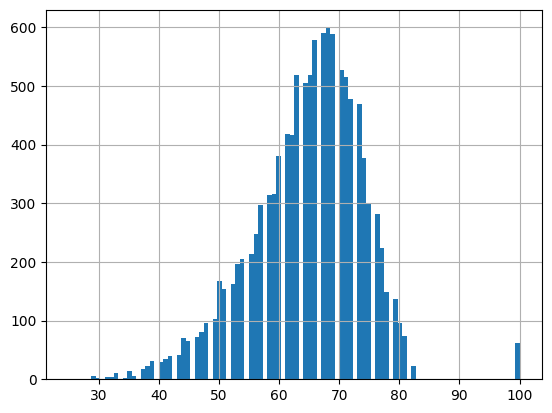

In [ ]:
tabla_regresion["PUNT_LECTURA_CRITICA"].hist(bins = 100)

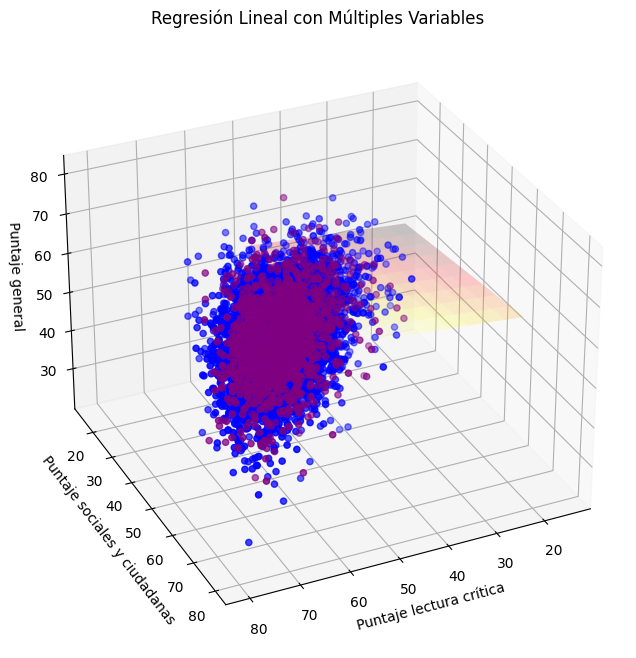

In [ ]:
fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(15, 50, num=10), np.linspace(15, 65, num=10))
plano_reg = array[0]*xx + array[1]*yy + modelo1.intercept_

ax.plot_surface(xx, yy, plano_reg, alpha=0.2, cmap='hot')
ax.scatter(trainXY["PUNT_LECTURA_CRITICA"], trainXY["PUNT_SOCIALES_CIUDADANAS"], trainZ, c='blue',s=20)
ax.scatter(testXY["PUNT_LECTURA_CRITICA"], testXY["PUNT_SOCIALES_CIUDADANAS"], testZ, c='purple',s=20)
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Puntaje lectura crítica')
ax.set_ylabel('Puntaje sociales y ciudadanas')
ax.set_zlabel('Puntaje general')
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()

In [ ]:

mlp_reg = MLPRegressor(hidden_layer_sizes=(10,10,10,10,10,10,10, 10, 10, 10),
                       max_iter = 500, activation = 'relu',
                       solver = 'adam', learning_rate = 'invscaling')
mlp_reg.fit(trainX, trainY) #

MLPRegressor(hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10),
             learning_rate='invscaling', max_iter=500)

In [ ]:

mlp_reg.score(testX, testY)

0.27309336694334063

In [ ]:
no_obs = np.array([[70, 60, 85, 55, 65]])
print('Se espera que el estudiante obtenga', mlp_reg.predict(no_obs), 'bajo el perceptrón multicapa y ',
      modelo_lineal.predict(no_obs), "bajo el modelo de regresión")

Se espera que el estudiante obtenga [59.36289438] bajo el perceptrón multicapa y  [60.04986732] bajo el modelo de regresión


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from scipy.stats import spearmanr, kendalltau
import numpy as np

variables_puntajes = [
    'PUNT_LECTURA_CRITICA',
    'PUNT_MATEMATICAS',
    'PUNT_C_NATURALES',
    'PUNT_SOCIALES_CIUDADANAS',
    'PUNT_INGLES'
]

for var in variables_puntajes:
    pearson_corr = np.corrcoef(tabla_regresion1[var], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])[0, 1]
    spearman_corr, _ = spearmanr(tabla_regresion1[var], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
    kendall_corr, _ = kendalltau(tabla_regresion1[var], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])

    print(f"Para la variable {var}:")
    print(f"Coeficiente de correlación de Pearson: {pearson_corr:.4f}")
    print(f"Coeficiente de correlación de Spearman: {spearman_corr:.4f}")
    print(f"Coeficiente de correlación de Kendall: {kendall_corr:.4f}\n")


Para la variable PUNT_LECTURA_CRITICA:
Coeficiente de correlación de Pearson: 0.2297
Coeficiente de correlación de Spearman: 0.2278
Coeficiente de correlación de Kendall: 0.1560

Para la variable PUNT_MATEMATICAS:
Coeficiente de correlación de Pearson: 0.2670
Coeficiente de correlación de Spearman: 0.2728
Coeficiente de correlación de Kendall: 0.1870

Para la variable PUNT_C_NATURALES:
Coeficiente de correlación de Pearson: 0.2444
Coeficiente de correlación de Spearman: 0.2435
Coeficiente de correlación de Kendall: 0.1664

Para la variable PUNT_SOCIALES_CIUDADANAS:
Coeficiente de correlación de Pearson: 0.2371
Coeficiente de correlación de Spearman: 0.2340
Coeficiente de correlación de Kendall: 0.1599

Para la variable PUNT_INGLES:
Coeficiente de correlación de Pearson: 0.4734
Coeficiente de correlación de Spearman: 0.4967
Coeficiente de correlación de Kendall: 0.3458

